In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# This option helps us to show all the columns. If not done, we dont clearly see the middle columns when using methods like describe().

pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking for duplicated data

In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace=True)

Checking and handling NULL values

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data has no NULL values. 

Let's check if the given data is balanced or not - as it will highly influence model training.

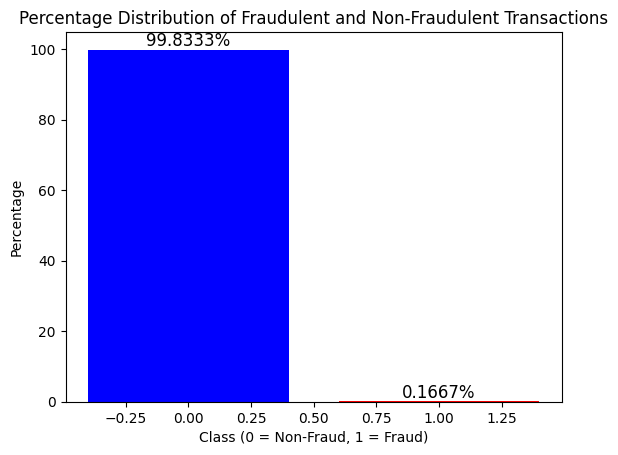

In [10]:
class_counts = df['Class'].value_counts(normalize=True) * 100

plt.bar(class_counts.index, class_counts.values, color=['blue','red'])

plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Percentage")
plt.title("Percentage Distribution of Fraudulent and Non-Fraudulent Transactions")

for i,v in enumerate(class_counts.values):
    plt.text(i, v+1, f"{v:.4f}%", ha='center',fontsize=12)

plt.show()

Very small percentagee, only 0.1667% of the data belongs to fraud class. We see the data is highly imbalanced.

Now we will check for outliers

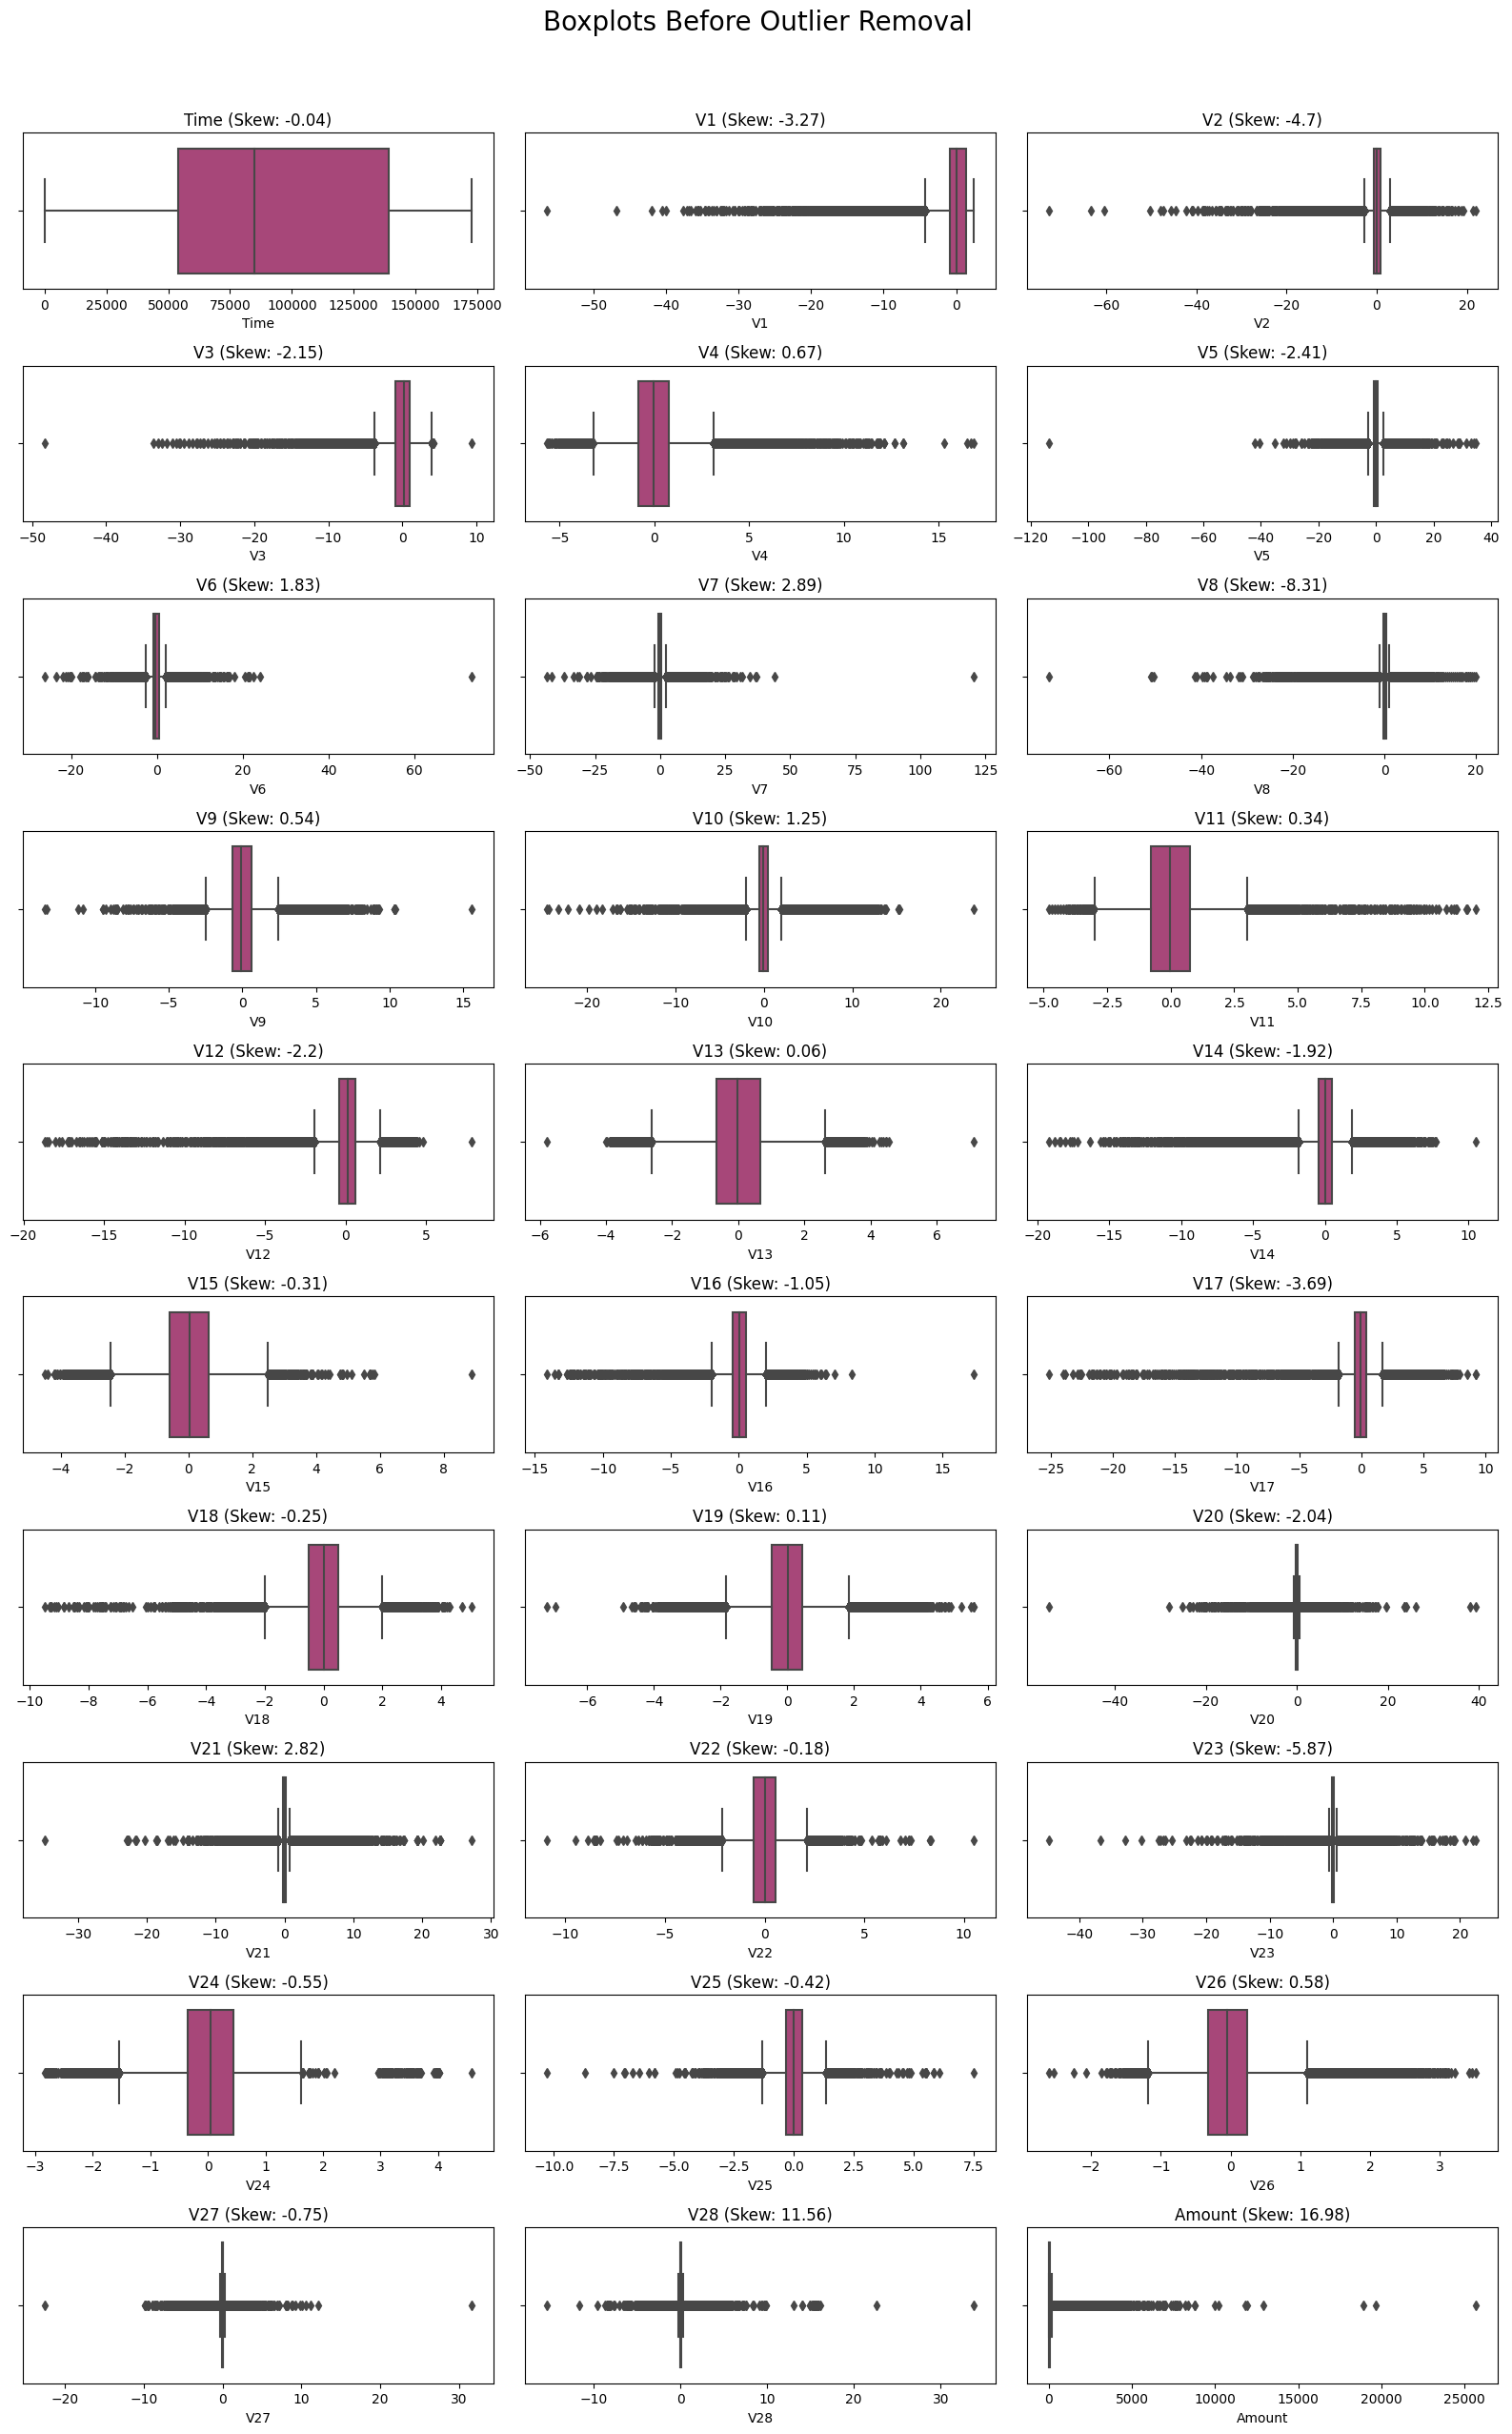

In [11]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("Class")  # Removing target column

def visualize_boxplots(data, features, row_count, col_count, main_title):
    fig, axes = plt.subplots(nrows=row_count, ncols=col_count, figsize=(16, 25), sharey=True)
    fig.suptitle(main_title, fontsize=20, y=1.02)
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        sns.boxplot(x=data[feature], ax=axes[idx], palette="magma")
        skew_value = round(data[feature].skew(), 2)
        axes[idx].set_title(f"{feature} (Skew: {skew_value})", fontsize=12)

    plt.tight_layout()
    plt.show()

visualize_boxplots(df, num_features, row_count=10, col_count=3, main_title="Boxplots Before Outlier Removal")


Now we will remove these outliers using z score

In [12]:
from collections import Counter
def find_outliers_zscore(dataset, columns, threshold=3, min_occurrences=1):
    detected_indices = []

    for col in columns:
        mean_val = dataset[col].mean()
        std_dev = dataset[col].std()
        
        z_scores = (dataset[col] - mean_val) / std_dev
        outlier_idx = dataset[np.abs(z_scores) > threshold].index
        
        detected_indices.extend(outlier_idx)

    outlier_count = Counter(detected_indices)

    filtered_outliers = [idx for idx, count in outlier_count.items() if count > min_occurrences]

    print(f"Number of removed outliers: {len(filtered_outliers)}")
    
    return filtered_outliers

# Identifying outliers
outlier_indices = find_outliers_zscore(df, num_features, threshold=3, min_occurrences=1)

Number of removed outliers: 14544


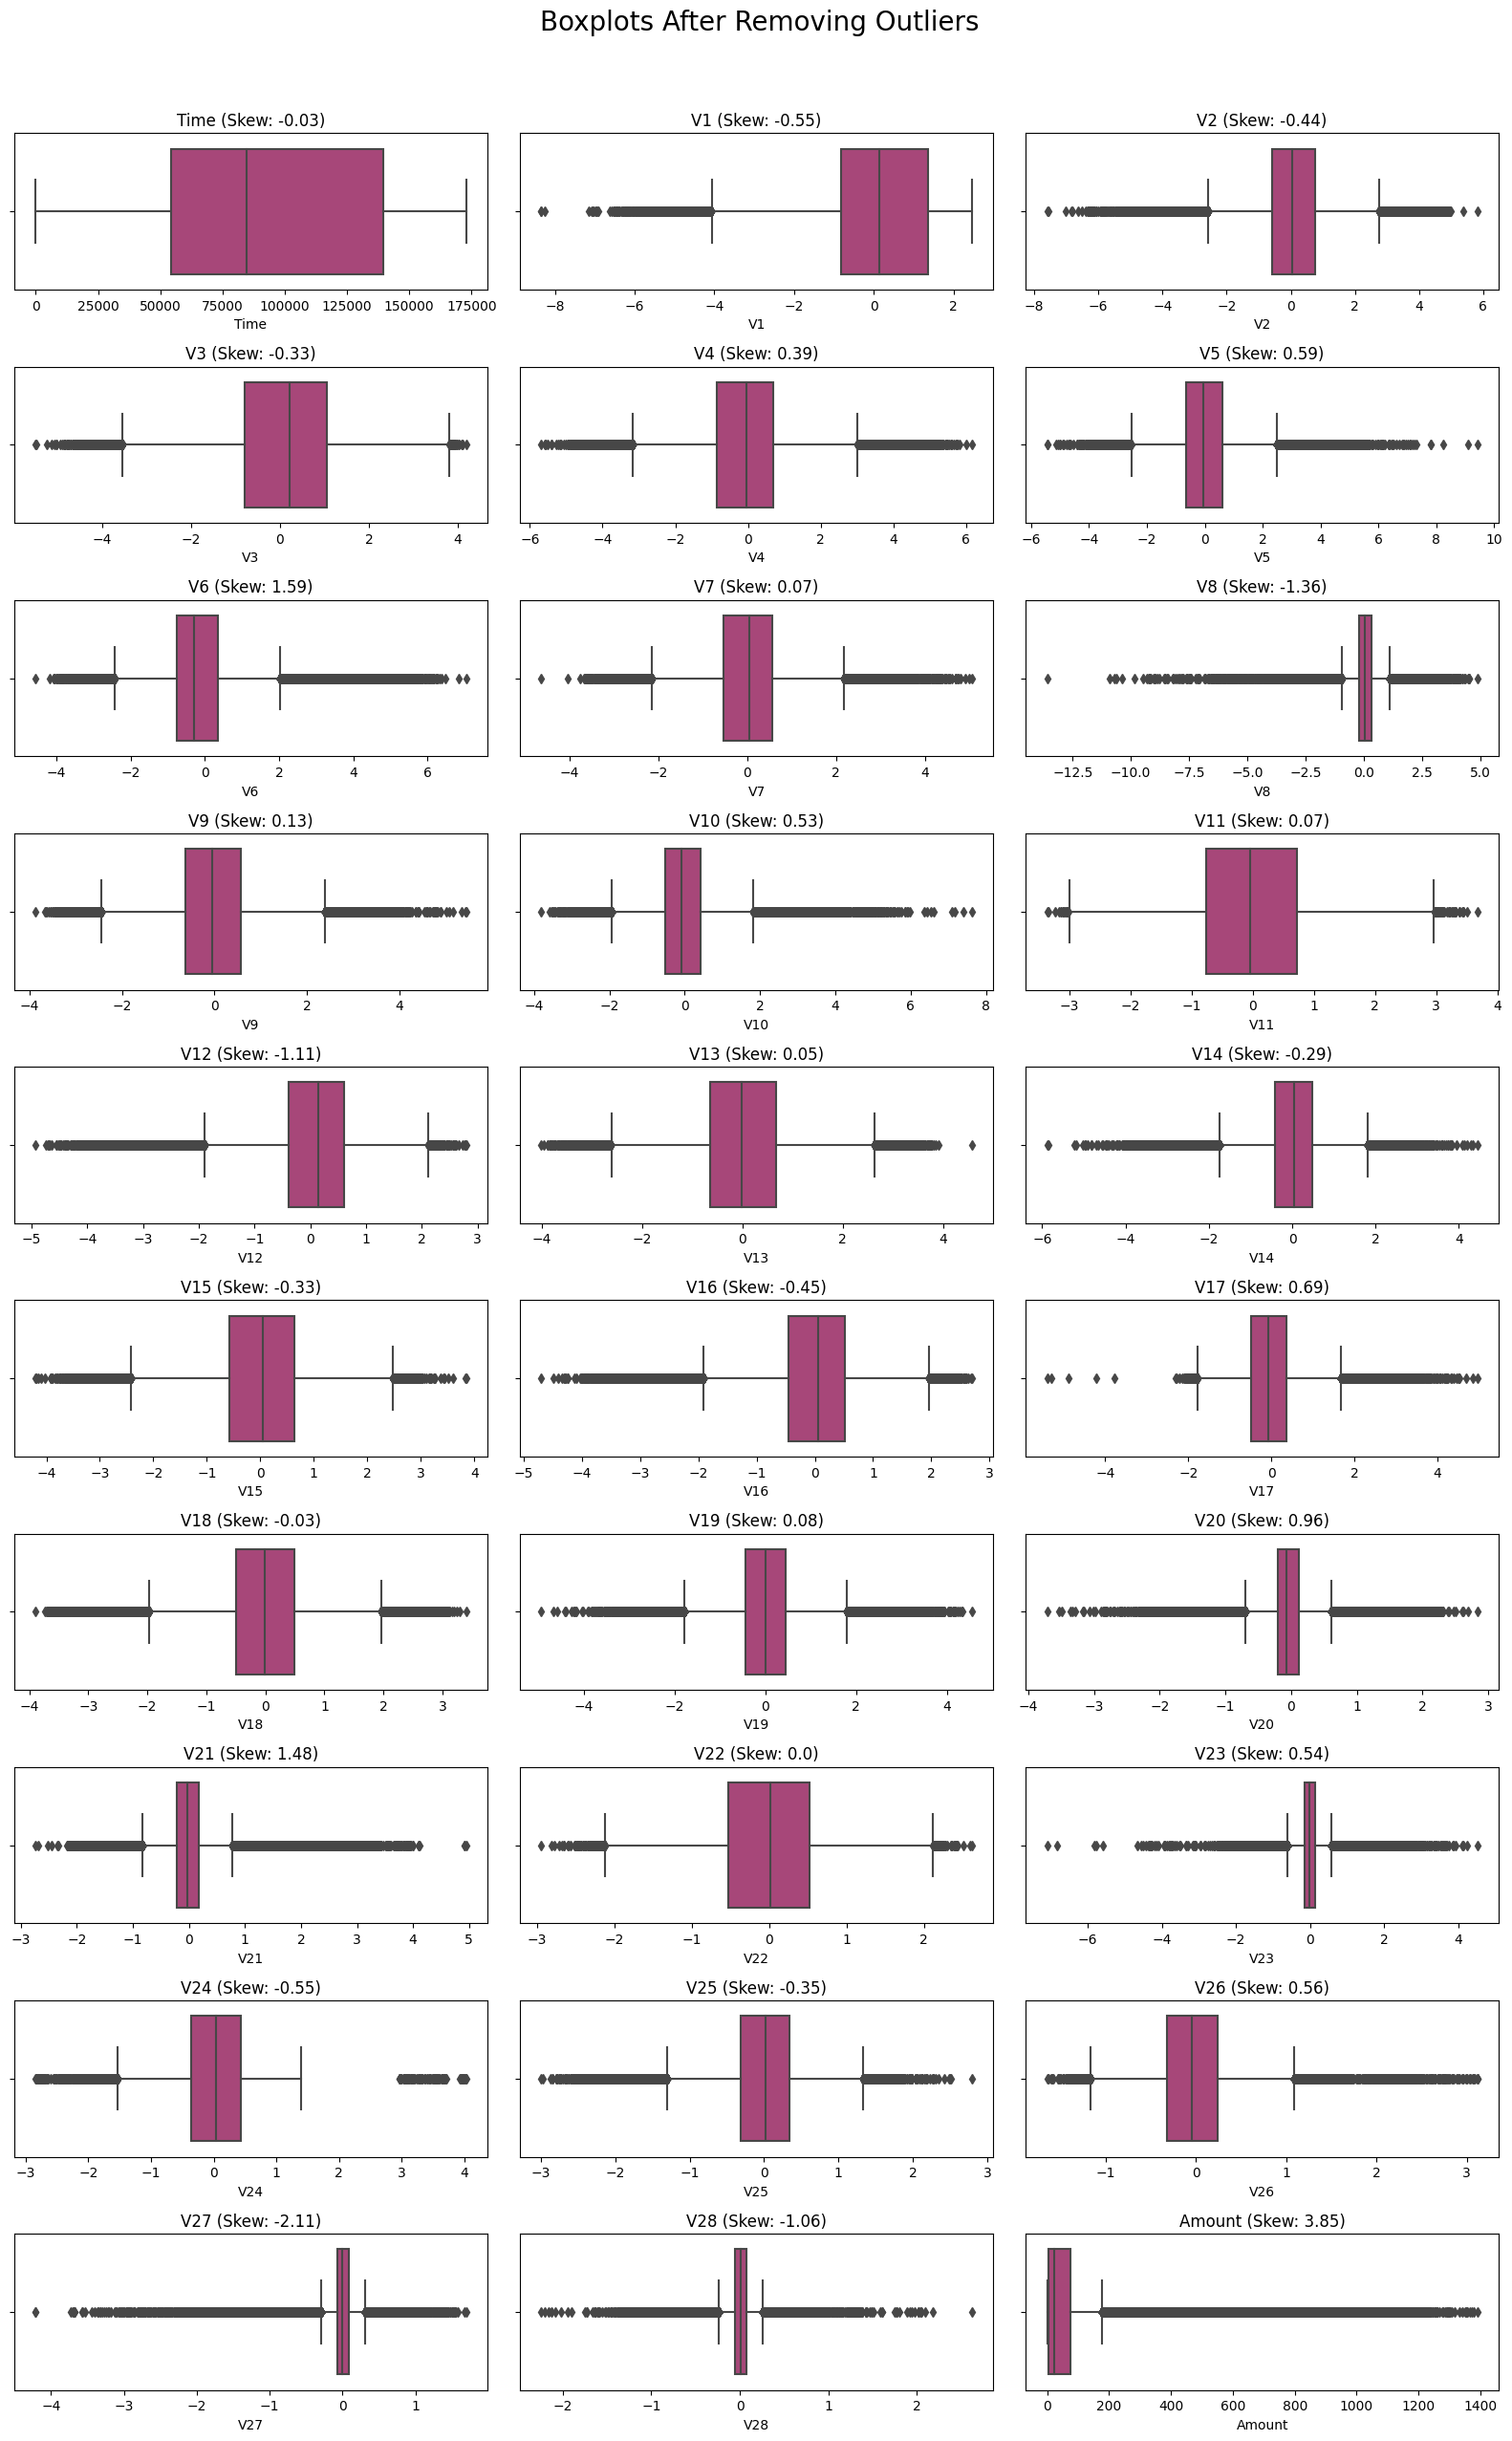

In [15]:
df_cleaned = df.drop(index=outlier_indices).reset_index(drop=True)

visualize_boxplots(df_cleaned, num_features, row_count=10, col_count=3, main_title="Boxplots After Removing Outliers")

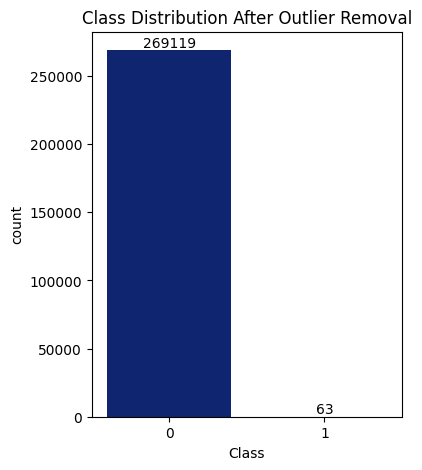

In [16]:
plt.figure(figsize=(4, 5))
ax = sns.countplot(data=df_cleaned, x='Class', palette="dark")
ax.bar_label(ax.containers[0])
plt.title("Class Distribution After Outlier Removal")
plt.show()

In [17]:
df = df_cleaned

Let's checck correlation between features

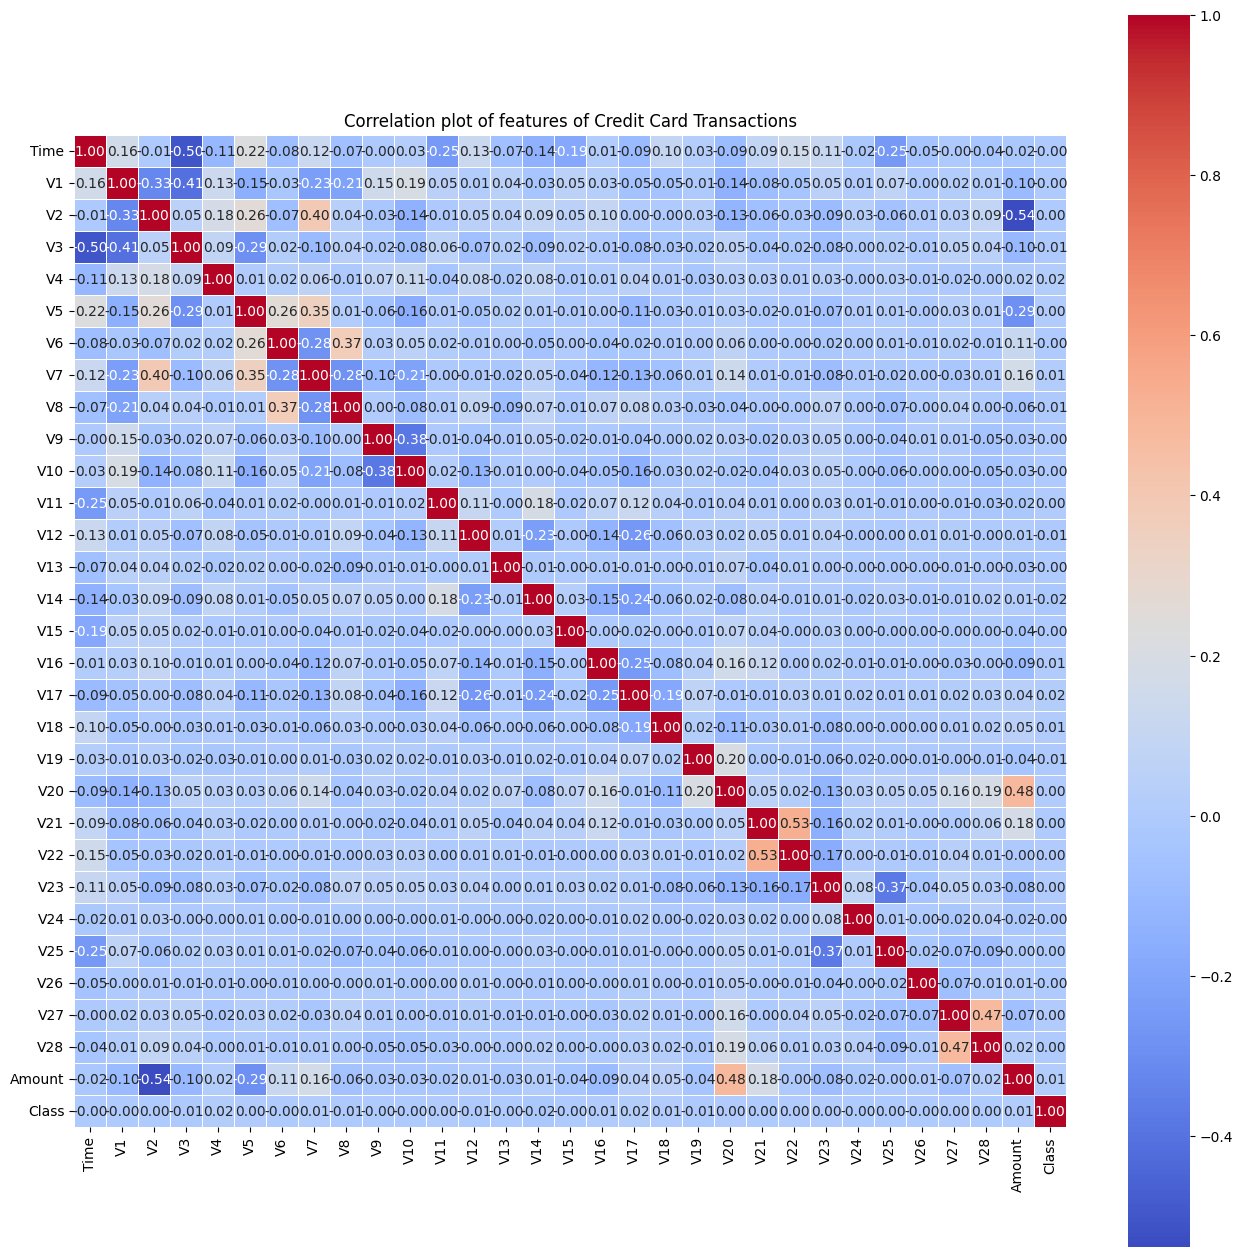

In [18]:
plt.figure(figsize = (16,16))
plt.title('Correlation plot of features of Credit Card Transactions')
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, xticklabels=True, yticklabels=True)
plt.show()

# Train Test Split (important)

We need to divide train test split in a way that we don't have imbalance training datasets. So we will use 'Statratified Splitting'.


In [19]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

Standard Scaling of our Features

In [20]:
# def apply_standard_scaling(dataframe, columns):
#     scaler = StandardScaler()
#     dataframe[columns] = scaler.fit_transform(dataframe[columns])
#     return dataframe

# # Standard Scaling
# columns_to_scale = ['Amount']
# X_train = apply_standard_scaling(X_train, columns_to_scale)
# X_test = apply_standard_scaling(X_test, columns_to_scale)

Stratified k-fold

In [43]:
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

models = {
    "SVM": (SVC(probability=True, class_weight="balanced", random_state=42), 
            {'C': [1], 'kernel': ['rbf']}),

    "Logistic Regression": (LogisticRegression(class_weight="balanced", random_state=42), 
                            {'C': [1], 'solver': ['liblinear']}),

    "Decision Tree": (DecisionTreeClassifier(class_weight="balanced", random_state=42), 
                      {'max_depth': [8]}),

    "Random Forest": (RandomForestClassifier(class_weight="balanced", random_state=42), 
                      {'n_estimators': [30]})
}

In [45]:
for name, (model, param_grid) in models.items():
    print(f"Training {name}...")

    # Apply Feature Scaling for SVM & Logis. Reg.
    if name in ["SVM", "Logistic Regression"]:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train_used, X_test_used = X_train_scaled, X_test_scaled
    else:
        X_train_used, X_test_used = X_train, X_test

    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='recall', n_jobs=-1)
    grid_search.fit(X_train_used, y_train)

    best_model = grid_search.best_estimator_

    # pedict & Calculate Metrics
    y_pred = best_model.predict(X_test_used)
    y_prob = best_model.predict_proba(X_test_used)[:, 1]  

    conf_matrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # precision-Recall AUC
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall_vals, precision_vals)

    print(f"{name} - Recall={recall:.4f}, Precision={precision:.4f}, F1 Score={f1:.4f}, Accuracy={accuracy:.4f}, ROC AUC={roc_auc:.4f}, PR AUC={pr_auc:.4f}\n")

    results.append((name, recall, precision, f1, accuracy, roc_auc, pr_auc))


Training SVM...
SVM - Recall=0.1250, Precision=0.0185, F1 Score=0.0323, Accuracy=0.9982, ROC AUC=0.7799, PR AUC=0.0042

Training Logistic Regression...
Logistic Regression - Recall=0.8750, Precision=0.0016, F1 Score=0.0031, Accuracy=0.8682, ROC AUC=0.9004, PR AUC=0.0056

Training Decision Tree...
Decision Tree - Recall=0.3750, Precision=0.0019, F1 Score=0.0039, Accuracy=0.9540, ROC AUC=0.6645, PR AUC=0.0013

Training Random Forest...
Random Forest - Recall=0.0000, Precision=0.0000, F1 Score=0.0000, Accuracy=0.9998, ROC AUC=0.5602, PR AUC=0.0034



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
df_results = pd.DataFrame(results, columns=['Model', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'ROC AUC', 'PR AUC'])
print(df_results)


                 Model  Recall  Precision  F1 Score  Accuracy   ROC AUC  \
0                  SVM   0.125   0.018519  0.032258  0.998217  0.779875   
1  Logistic Regression   0.875   0.001576  0.003147  0.868194  0.900424   
2        Decision Tree   0.375   0.001940  0.003861  0.953994  0.664491   
3        Random Forest   0.000   0.000000  0.000000  0.999762  0.560214   

     PR AUC  
0  0.004190  
1  0.005603  
2  0.001341  
3  0.003372  
